In [1]:
import pandas as pd
from joblib import load
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
import string
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.base import TransformerMixin

In [2]:
df_facebook = pd.read_json("data/complaints_from_2020_01_01_to_2021_12_31__2022_03_22_facebook.json")

In [4]:
df_test = df_facebook[["title","asset_text_extracts", "submitted_complaint_type", "resolved_complaint_type"]]

In [5]:
# class for cleaning the text
class CleanTextTransformer(TransformerMixin):
    def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
            return {}

def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    return text

In [6]:
SVM_model = load('model/one-classSVM.joblib') 

In [7]:
predictions = SVM_model.predict(list(df_test["asset_text_extracts"]))

In [8]:
len(predictions)

253

In [9]:
df_pred = pd.DataFrame(predictions).reset_index()

In [10]:
test_facebook= pd.concat([df_test.reset_index(), df_pred], axis=1)

In [11]:
df_results = test_facebook.dropna().reset_index()

In [12]:
del df_results["index"]

In [13]:
df_results["cat"] = df_results[0]

In [14]:
del df_results[0]

In [15]:
cat_list = []
for item in df_results.cat:
    if item == -1:
        Class = "Not verified"
    elif item ==1:
        Class = "Verified"
    cat_list.append(Class)

In [16]:
df_results["Class"] = cat_list

In [17]:
df_results

,level_0,title,asset_text_extracts,submitted_complaint_type,resolved_complaint_type,cat,Class
0,0,Facemasks are not necessary in those who are a...,Cell C 13:40\n96%\nSearch Facebook\nGillian Mc...,Mis- or disinformation,Mis- or disinformation,-1,Not verified
1,2,Langebaan restaurant set alight over food parc...,36\nQI 3011:39\nSearch\nPaul Kruger\nYesterday...,Mis- or disinformation,Mis- or disinformation,1,Verified
2,3,Facebook post linking COVID-19 to 5G technology,Vodacom-Stay Safe 73 B/s 21:30\nEmergency call...,Mis- or disinformation,Mis- or disinformation,-1,Not verified
3,6,Inside China's Death Labs: the true story of t...,Donald Trump Jr.\n13 hrs\nWho is responsible f...,Mis- or disinformation,Mis- or disinformation,1,Verified
4,8,Solidarity Fund excludes White Poor,06:05 4\nGerhard Viljoen\nSunday at 18:01.\nAP...,Mis- or disinformation,Mis- or disinformation,1,Verified
...,...,...,...,...,...,...,...
145,245,Facebook: User spreading Covid vaccine misinfo...,Lincoln Nichols\n22h\n.\nL\nImagine if you wil...,Mis- or disinformation,Mis- or disinformation,1,Verified
146,247,"Facebook: ""The Plandemic conspiracy""",Sluier De Ridder\n12 November at 21:26 .\nDIE ...,Mis- or disinformation,Mis- or disinformation,-1,Not verified
147,248,Facebook: Vaccine mandates and passports.,16:39\nf\nVo))\nLTE\n21%\nSearch\nNtsinzwa Yom...,Mis- or disinformation,Mis- or disinformation,1,Verified
148,251,"Facebook: ""Seems Omi variant is the truth tell...",Mariana Martin\n4d\n-\nSeems Omi variant is th...,Mis- or disinformation,Mis- or disinformation,1,Verified


C:\Users\Mohlatlego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

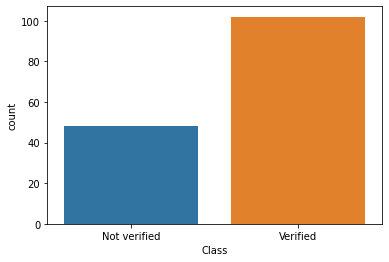

In [18]:
sns.countplot(df_results['Class'])

In [19]:
df_results['Class'].value_counts()

Verified        102
Not verified     48
Name: Class, dtype: int64

In [20]:
df_results.value_counts(['submitted_complaint_type','Class']) 

submitted_complaint_type  Class       
Mis- or disinformation    Verified        96
                          Not verified    45
Hate speech               Verified         4
                          Not verified     2
Incitement to violence    Verified         2
                          Not verified     1
dtype: int64